# Clustering & Principal component analysis (PCA)

#### Project Brief:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that comes while making this decision are mostly related to choosing the countries that are in the direst need of aid.  

And this is where we come in as data scientist. Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most. 

In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the required dataset

country_data = pd.read_csv('/content/Country-data.csv')

In [3]:
print(country_data.shape)
country_data.head()

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Checking the percentage of missing values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Checking for outliers

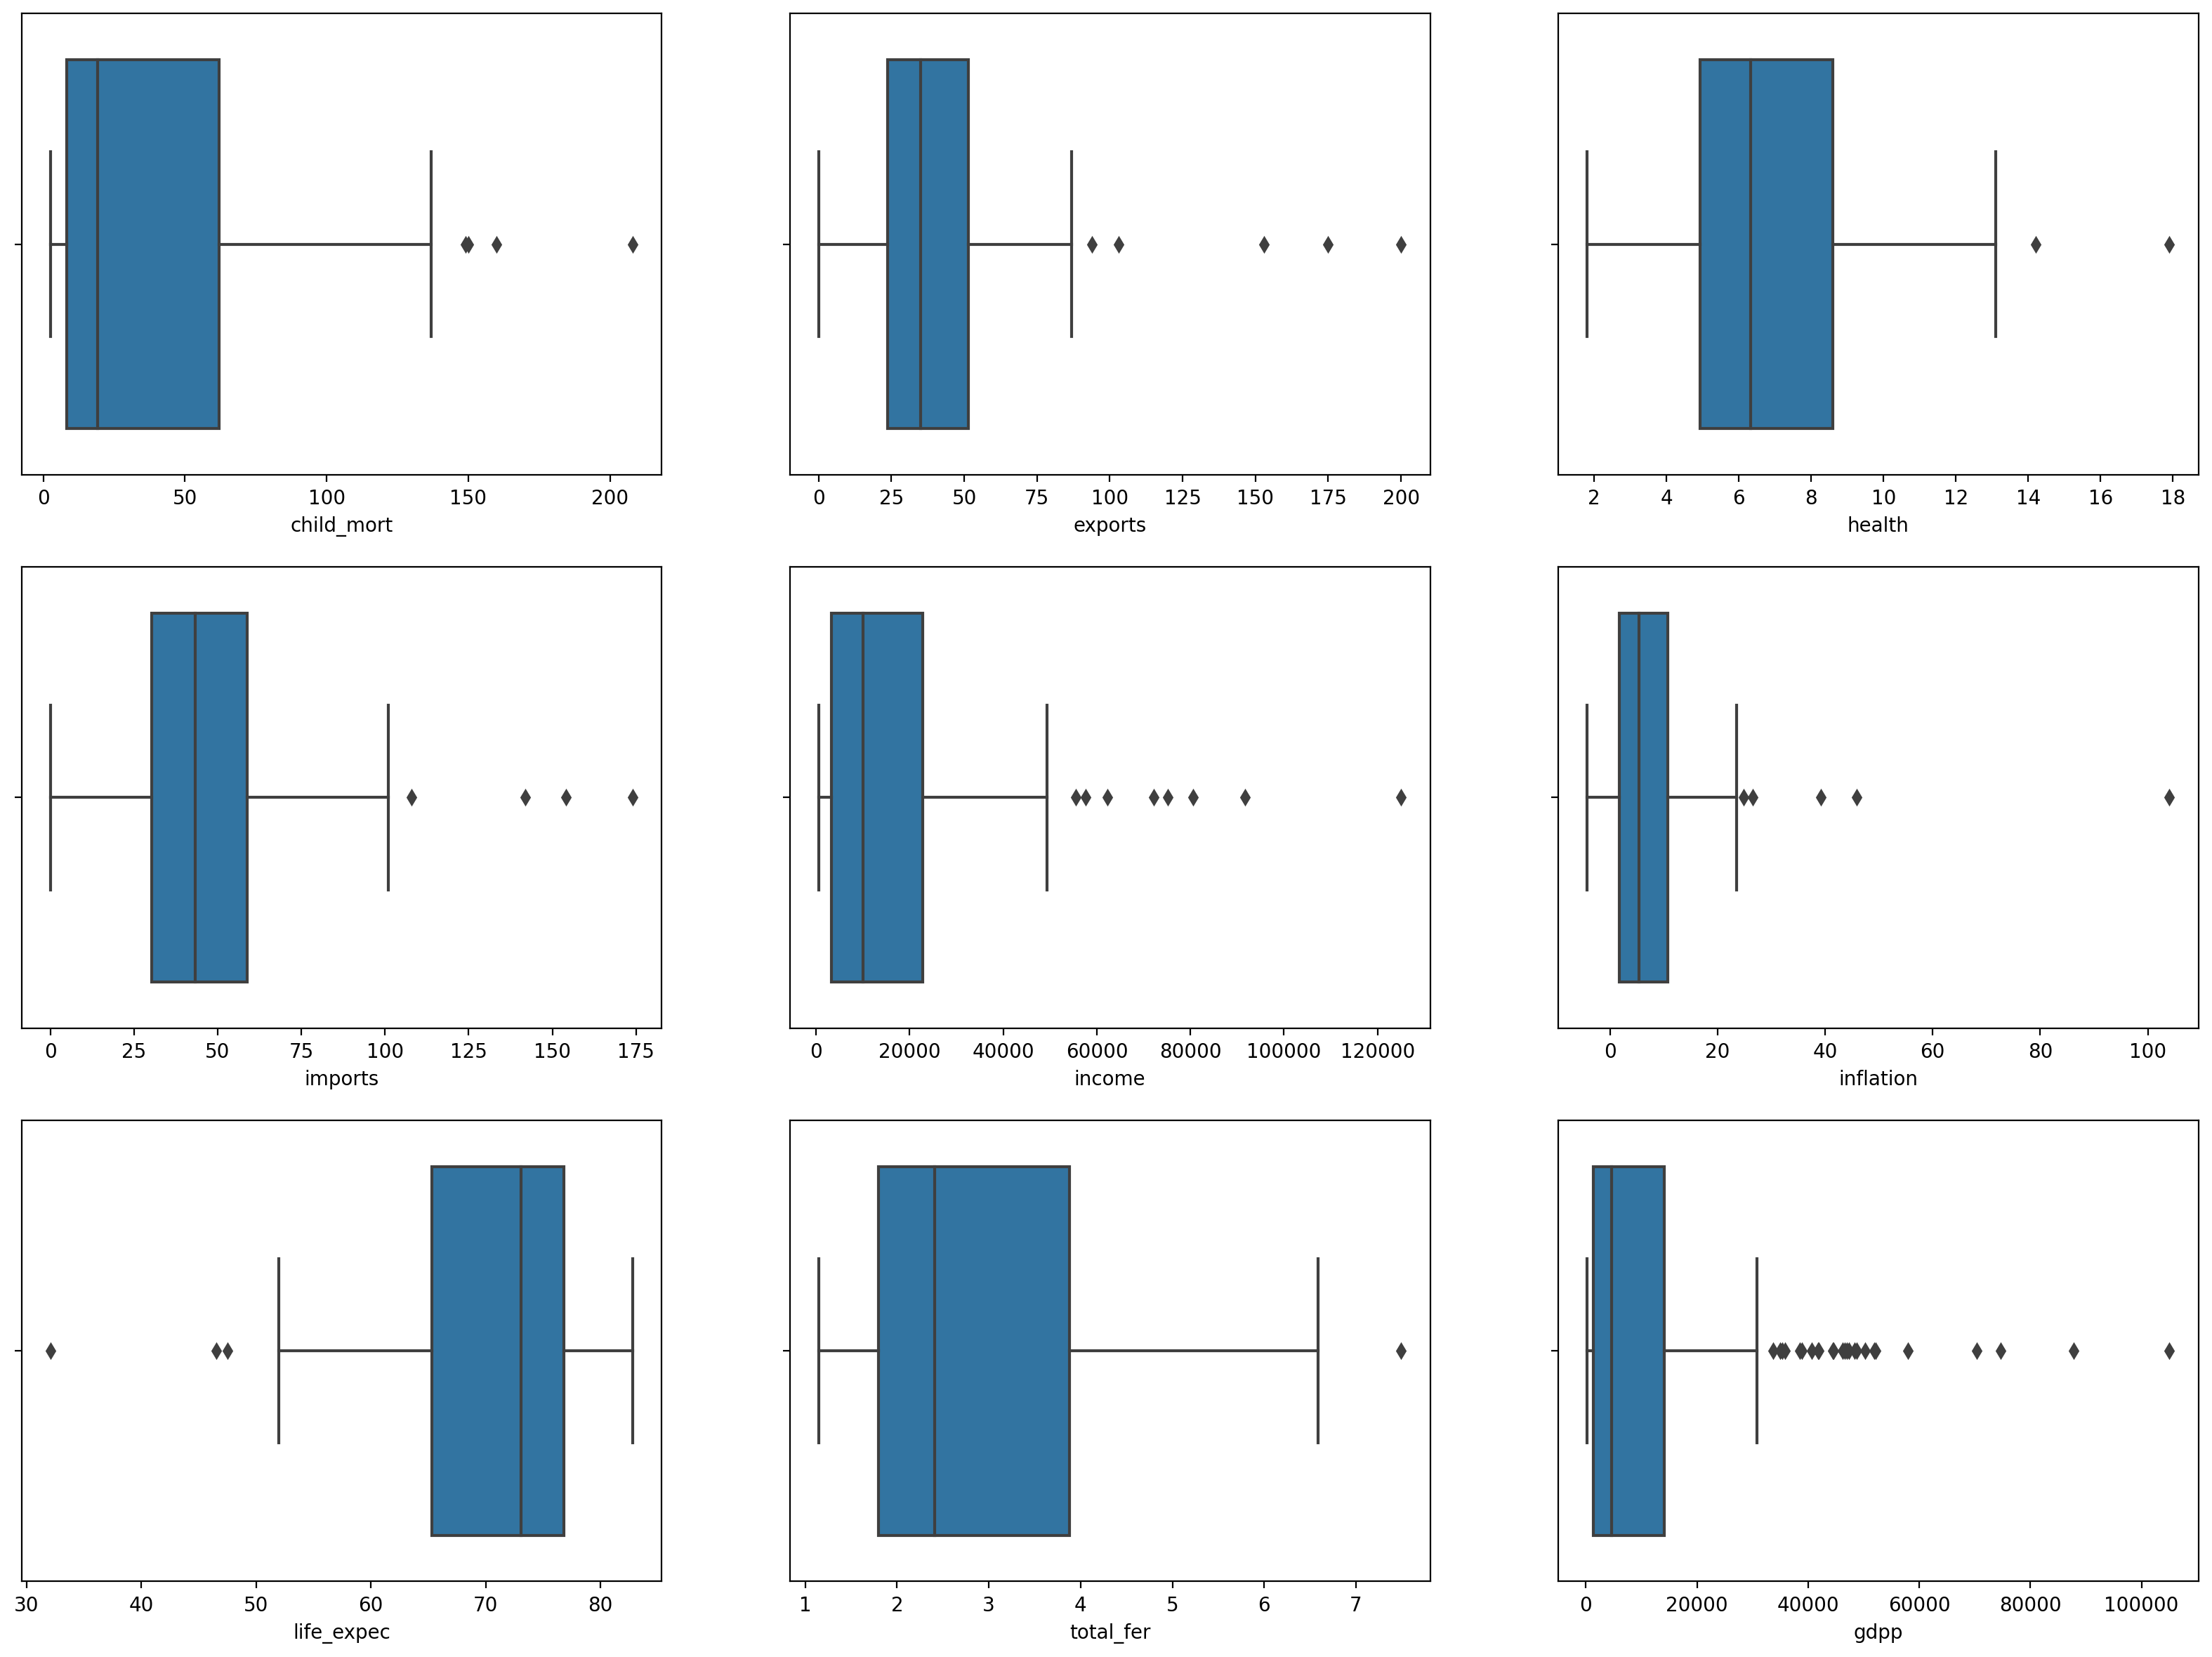

In [4]:
# checking for outliers using box-plots

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = country_data)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = country_data)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = country_data)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = country_data)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = country_data)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = country_data)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = country_data)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = country_data)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = country_data)

In [5]:
# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

[[1.29153238 1.13827979 0.27908825 ... 1.61909203 1.90288227 0.67917961]
 [0.5389489  0.47965843 0.09701618 ... 0.64786643 0.85997281 0.48562324]
 [0.27283273 0.09912164 0.96607302 ... 0.67042323 0.0384044  0.46537561]
 ...
 [0.37231541 1.13030491 0.0088773  ... 0.28695762 0.66120626 0.63775406]
 [0.44841668 0.40647827 0.59727159 ... 0.34463279 1.14094382 0.63775406]
 [1.11495062 0.15034774 0.33801514 ... 2.09278484 1.6246091  0.62954556]]


*******************************************************************************


Below are the outlier points along with the respective column numbers in the second array


(array([ 23,  66,  66,  82,  91,  91,  91,  91,  98,  98, 112, 113, 114,
       123, 123, 132, 133, 133, 145, 159, 163]), array([4, 0, 6, 4, 1, 3, 4, 8, 1, 3, 7, 5, 8, 4, 8, 0, 1, 3, 8, 2, 5]))


In [6]:
# Removing the outliers

country_data_outliers_removed = country_data[(z<3).all(axis=1)]

In [7]:
print(country_data_outliers_removed.shape)
country_data_outliers_removed.head()

(153, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
print('Shape of dataframe before outlier removal: ' + str(country_data.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(country_data_outliers_removed.shape))

Shape of dataframe before outlier removal: (167, 10)


Shape of dataframe after outlier removal: (153, 10)


In [9]:
X = country_data_outliers_removed.drop('country',axis =1)  
y = country_data_outliers_removed['country']

### PCA

In [10]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

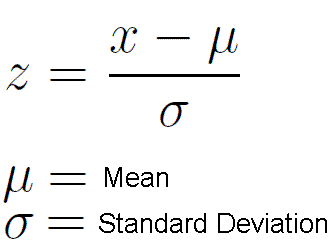

In [12]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [13]:
X.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [14]:
scaler = StandardScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled[:5,:5]

array([[ 1.46183636, -1.41330427,  0.31809414, -0.04379952, -0.95456912],
       [-0.56911214, -0.52600184, -0.08875965,  0.15011384, -0.331921  ],
       [-0.27385196, -0.01333821, -1.02886841, -0.75132124, -0.10965359],
       [ 2.25655534,  1.16480224, -1.55027327, -0.14861755, -0.63351618],
       [-0.74295692,  0.3366533 , -0.29416156,  0.68992671,  0.354339  ]])

In [17]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [18]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [19]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


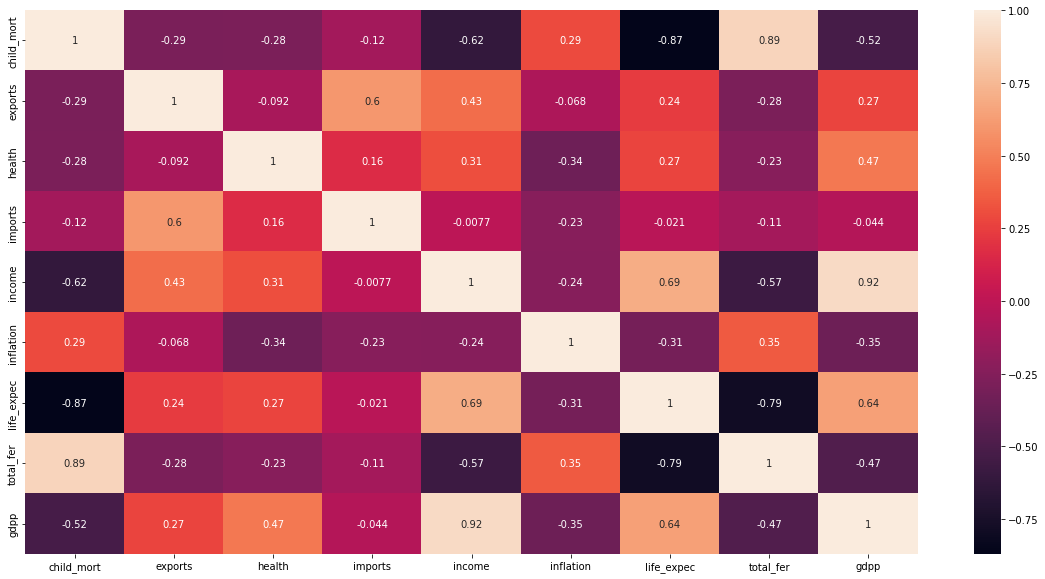

In [20]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [21]:
# we can see that some columns have significant correlation among themselves 

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(random_state=42)

In [24]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
#Principal axes in feature space,
pca.components_

array([[-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
        -0.22650995,  0.42715413, -0.40550525,  0.39482635],
       [ 0.03459073,  0.6327697 , -0.12933969,  0.7257587 , -0.07067406,
        -0.06317055, -0.14387869,  0.01853034, -0.15786626],
       [ 0.18299915, -0.25554275,  0.66457406,  0.25152297, -0.12332053,
        -0.5567656 , -0.18244321,  0.17127257,  0.09203817],
       [ 0.34760292,  0.26667437,  0.15444884, -0.08860929,  0.45993894,
         0.30990123, -0.19006785,  0.42255347,  0.50407451],
       [-0.22366393, -0.08811952,  0.57689406,  0.2178802 , -0.13508527,
         0.71277143,  0.05368612, -0.0894036 , -0.15736745],
       [ 0.05354957,  0.29421054,  0.19869989, -0.3552151 ,  0.04942437,
        -0.03553489, -0.63615054, -0.57141714, -0.10001314],
       [ 0.00091456, -0.56038917, -0.29999471,  0.46315184,  0.24684036,
         0.13004423, -0.37448883, -0.29824888,  0.27280168],
       [-0.77430348,  0.00447314, -0.03962214, -0.07430007,  0

In [26]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

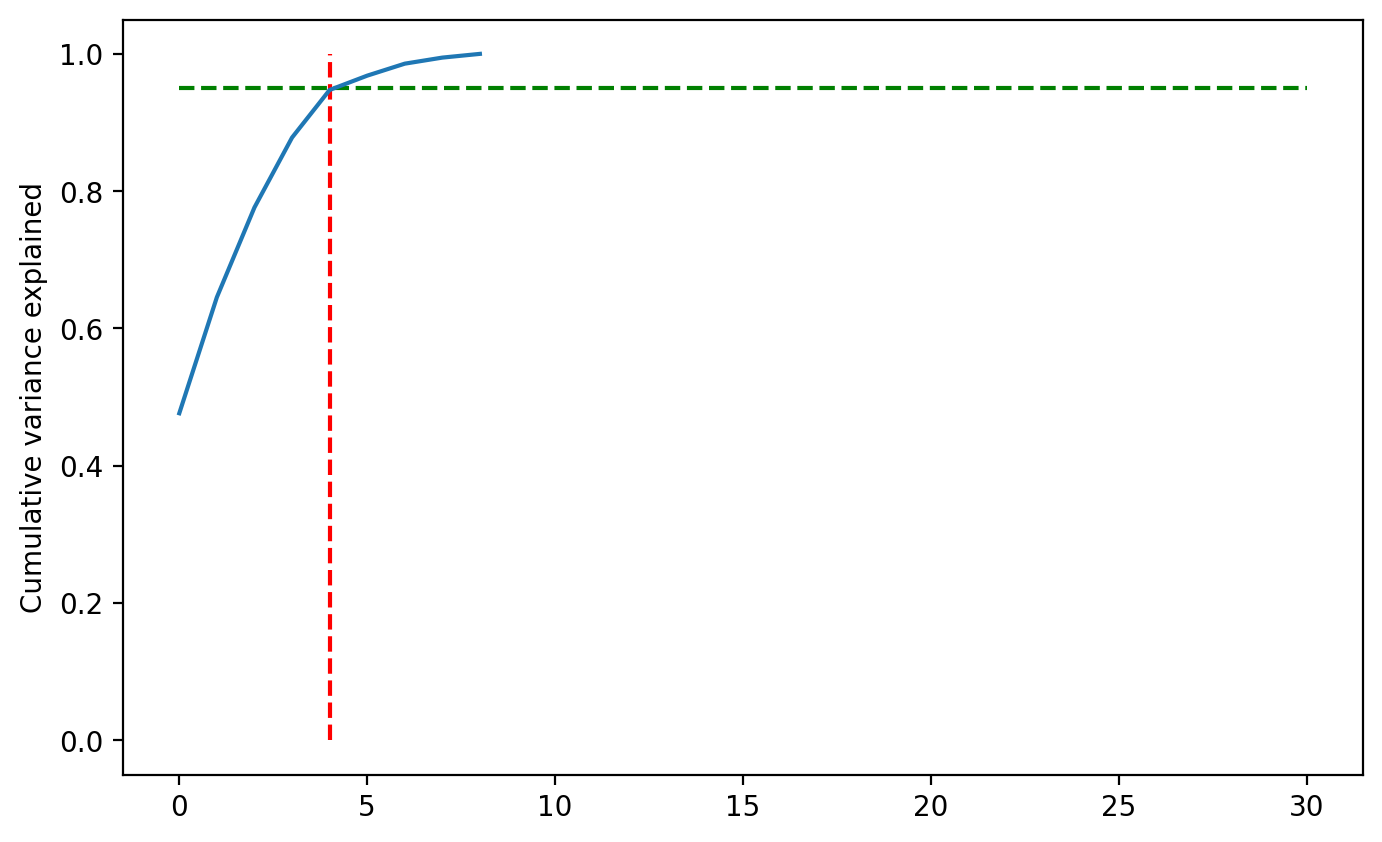

In [34]:
fig = plt.figure(figsize=[8,5],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Performing PCA with 4 components

In [28]:
from sklearn.decomposition import IncrementalPCA

In [29]:
pca_final = IncrementalPCA(n_components=4)

In [30]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [31]:
print(X.shape)
print(X_pca_final.shape)

(153, 9)
(153, 4)


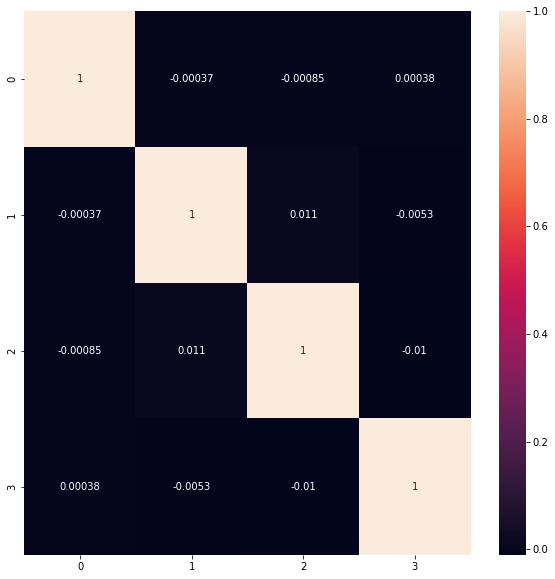

In [32]:
# Plotting the heatmap of the corr matrix
corrmat = np.corrcoef(X_pca_final.transpose())
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

# Clustering

### K - means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([0, 4, 2, 0, 4, 2, 2, 3, 3, 2, 3, 1, 2, 4, 4, 1, 4, 0, 4, 2, 4, 0,
       2, 4, 0, 0, 4, 0, 3, 4, 0, 0, 2, 2, 2, 0, 0, 0, 4, 0, 4, 1, 1, 3,
       2, 2, 2, 4, 0, 0, 1, 4, 3, 3, 2, 0, 4, 3, 0, 3, 4, 2, 0, 0, 4, 1,
       3, 2, 2, 2, 2, 1, 3, 3, 2, 3, 4, 2, 0, 0, 4, 0, 4, 4, 0, 0, 1, 1,
       4, 0, 0, 1, 1, 0, 0, 4, 4, 4, 2, 4, 4, 0, 2, 4, 2, 3, 3, 1, 0, 1,
       4, 2, 2, 4, 3, 4, 2, 0, 4, 2, 0, 4, 1, 1, 1, 4, 0, 1, 3, 2, 4, 0,
       4, 3, 0, 0, 4, 0, 0, 4, 4, 2, 4, 0, 4, 1, 3, 2, 2, 4, 4, 0, 0],
      dtype=int32)

Finding the Optimal Number of Clusters

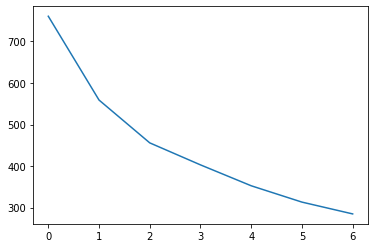

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [ ]:
# from the elbow method we can say that k = 4 clusters seems to be a good choice

In [ ]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2,
       0, 0, 0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1, 1, 3, 3,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 0, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 2, 2, 0, 1, 3,
       3, 0, 0, 3, 2, 0, 0, 1, 3, 0, 1, 3, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1,
       3, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 3, 1, 1],
      dtype=int32)

In [ ]:
country_data_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


# Countries which are in direst need of aid 

#### From K-Means clustering

We can see that countries with cluster labelled as '1' are in need of aid 

In [ ]:
K_Means_countries = country_data_outliers_removed[country_data_outliers_removed['K-Means_Cluster_ID'] == 0]
K_Means_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.10,76.5,2.89,4460,0
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.77,73.3,1.69,3220,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.80,69.1,1.92,5840,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.78,71.6,3.20,1980,0
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200,0
33,Chile,8.7,37.700,7.96,31.3000,19400,8.96,79.1,1.88,12900,0
34,China,15.7,26.300,5.07,22.6000,9530,6.94,74.6,1.59,4560,0
35,Colombia,18.6,15.900,7.59,17.8000,10900,3.86,76.4,2.01,6250,0


In [ ]:
K_Means_countries = country_data_outliers_removed[country_data_outliers_removed['K-Means_Cluster_ID'] == 1]
K_Means_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [ ]:
K_Means_countries = country_data_outliers_removed[country_data_outliers_removed['K-Means_Cluster_ID'] == 2]
K_Means_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2


In [ ]:
K_Means_countries = country_data_outliers_removed[country_data_outliers_removed['K-Means_Cluster_ID'] == 3]
K_Means_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,3
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,3
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,3
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,3
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,3
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,3
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.120,66.1,2.88,786,3
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,3
